# HMDA Data Testing

## TODO:
### Data Collection

### Data Cleaning
- [ ] merge like columns together, ex: 'denial_reason-1', 'denial_reason-2', 'denial_reason-3',
       'denial_reason-4'

## Setup
-----

In [1]:
import gzip
import os
import requests
import subprocess
import pandas as pd
from pathlib import Path
from hmda_lib import valid_state_codes
from hmda_lib import valid_years

In [2]:
def download_hmda_data(fd, state, year):
    url = f'https://ffiec.cfpb.gov/v2/data-browser-api/view/csv?states={state}&years={year}'

    try:
        with requests.get(url, stream=True) as response:
            response.raise_for_status()
            with open(output_file, 'wb') as fd:
                for chunk in response.iter_content(chunk_size=1024):
                    if chunk:
                        fd.write(chunk)
        return True

    except requests.exceptions.RequestException as e:
        print(f"Error downloading data: {e}")
        return False

In [3]:
def compress_hmda_data(f):
    subprocess.run(['gzip', f])    

In [4]:
def existence_check():
    return False

## Data Collection
-----

In [5]:
# download HMDA data from API

state = 'MN'
years = ['2020', '2021', '2022']

for year in years:
    output_file = Path('hmda_data', f'hmda-{state}-{year}.csv')
    if os.path.exists(f'{output_file}.gz'):
        print('File exists already! Skipping!')
        continue
    else:
        print(f'Downloading HMDA data for: {year} {state}.....', end='')
        download_hmda_data(output_file, state, year)
        print(' compressing.....', end='')
        compress_hmda_data(output_file)
        print(' done!')

File exists already! Skipping!
File exists already! Skipping!
File exists already! Skipping!


In [6]:
# load the HMDA data into Pandas DataFrames

data_path = 'hmda_data'
filenames = os.listdir(data_path)
all_dataframes = []

for filename in filenames:
    if filename.endswith('.csv.gz'):
        filepath = Path(data_path, filename)
        with gzip.open(filepath, 'rt') as file:
            df = pd.read_csv(filepath)
        all_dataframes.append(df)

df = pd.concat(all_dataframes, ignore_index=True)

/var/folders/lz/1jz3djz94tj6bqr6cczlyr1w0000gp/T/ipykernel_986/1010219840.py:11: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
/var/folders/lz/1jz3djz94tj6bqr6cczlyr1w0000gp/T/ipykernel_986/1010219840.py:11: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
/var/folders/lz/1jz3djz94tj6bqr6cczlyr1w0000gp/T/ipykernel_986/1010219840.py:11: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


In [7]:
df

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2022,5493000YNV8IX4VD3X12,33460,MN,27019.0,2.701909e+10,C,Conventional:First Lien,Single Family (1-4 Units):Manufactured,Ethnicity Not Available,...,NaN,NaN,NaN,3001,9.16,117800,89,911,1082,43
1,2022,5493000YNV8IX4VD3X12,33460,MN,27163.0,2.716307e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,13470,27.78,117800,157,2675,2727,9
2,2022,5493000YNV8IX4VD3X12,99999,MN,27127.0,2.712775e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,3256,17.08,83600,93,940,1280,49
3,2022,5493000YNV8IX4VD3X12,33460,MN,27053.0,2.705300e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,4760,26.53,117800,82,1460,1818,69
4,2022,5493000YNV8IX4VD3X12,33460,MN,27163.0,2.716307e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5002,14.61,117800,124,1453,1923,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200773,2021,593C3GZG957YOJPS2Z63,33460,MN,27053.0,2.705311e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,3706,38.96,100600,78,903,1162,76
1200774,2021,593C3GZG957YOJPS2Z63,33460,MN,27053.0,2.705302e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5901,55.28,100600,75,588,1006,40
1200775,2021,593C3GZG957YOJPS2Z63,33460,MN,27053.0,2.705311e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,2805,32.94,100600,81,931,1146,76
1200776,2021,593C3GZG957YOJPS2Z63,33460,MN,27053.0,2.705302e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,3891,26.70,100600,75,1207,1365,61


In [8]:
for c in df.columns:
    print(c)

activity_year
lei
derived_msa-md
state_code
county_code
census_tract
conforming_loan_limit
derived_loan_product_type
derived_dwelling_category
derived_ethnicity
derived_race
derived_sex
action_taken
purchaser_type
preapproval
loan_type
loan_purpose
lien_status
reverse_mortgage
open-end_line_of_credit
business_or_commercial_purpose
loan_amount
loan_to_value_ratio
interest_rate
rate_spread
hoepa_status
total_loan_costs
total_points_and_fees
origination_charges
discount_points
lender_credits
loan_term
prepayment_penalty_term
intro_rate_period
negative_amortization
interest_only_payment
balloon_payment
other_nonamortizing_features
property_value
construction_method
occupancy_type
manufactured_home_secured_property_type
manufactured_home_land_property_interest
total_units
multifamily_affordable_units
income
debt_to_income_ratio
applicant_credit_score_type
co-applicant_credit_score_type
applicant_ethnicity-1
applicant_ethnicity-2
applicant_ethnicity-3
applicant_ethnicity-4
applicant_ethnicit

In [9]:
for c in df.columns:
    print(f'Examining column: {c}')
    print(df[c].value_counts())
    print()

Examining column: activity_year
activity_year
2020    493242
2021    460643
2022    246893
Name: count, dtype: int64

Examining column: lei
lei
6BYL5QZYBDK8S7L73M02    95149
KB1H1DSPRFMYMCUFXT09    66536
549300FGXN1K3HLB1R50    50244
549300WYBPIWKK6SQC06    44872
549300HW662MN1WU8550    29582
                        ...  
2549007NTZZX7VJJPB03        1
01KWVG908KE7RKPTNP46        1
5493007US5XO6WCOMQ49        1
549300TU1SISIUY3SK49        1
549300214PKB2Y1ZWH75        1
Name: count, Length: 1165, dtype: int64

Examining column: derived_msa-md
derived_msa-md
33460    848390
99999    193196
40340     42995
20260     41354
41060     33821
31860     15684
22020     12749
0          5463
24220      4305
29100      2821
Name: count, dtype: int64

Examining column: state_code
state_code
MN    1200778
Name: count, dtype: int64

Examining column: county_code
county_code
27053.0    285257
27037.0    111249
27123.0     99383
27003.0     94114
27163.0     75582
            ...  
27011.0       561
2

interest_only_payment
2       1091943
1         66467
1111      42368
Name: count, dtype: int64

Examining column: balloon_payment
balloon_payment
2       1132732
1111      42368
1         25678
Name: count, dtype: int64

Examining column: other_nonamortizing_features
other_nonamortizing_features
2       1157706
1111      42368
1           704
Name: count, dtype: int64

Examining column: property_value
property_value
Exempt       42390
255000       20062
305000       19857
275000       18459
265000       17568
             ...  
19015000         1
22005000         1
11645000         1
19595000         1
5355000.0        1
Name: count, Length: 1443, dtype: int64

Examining column: construction_method
construction_method
1    1184980
2      15798
Name: count, dtype: int64

Examining column: occupancy_type
occupancy_type
1    1124474
3      47633
2      28671
Name: count, dtype: int64

Examining column: manufactured_home_secured_property_type
manufactured_home_secured_property_type
3     

applicant_sex
1    652822
2    354570
4    110525
3     82322
6       539
Name: count, dtype: int64

Examining column: co-applicant_sex
co-applicant_sex
5    580273
2    336282
1    148917
4     89258
3     45768
6       280
Name: count, dtype: int64

Examining column: applicant_sex_observed
applicant_sex_observed
2    1013425
3     166892
1      20461
Name: count, dtype: int64

Examining column: co-applicant_sex_observed
co-applicant_sex_observed
4    580273
2    486836
3    124024
1      9645
Name: count, dtype: int64

Examining column: applicant_age
applicant_age
35-44    305245
25-34    233728
45-54    231034
55-64    170608
8888     112769
65-74     88520
<25       32545
>74       26322
9999          7
Name: count, dtype: int64

Examining column: co-applicant_age
co-applicant_age
9999     569677
35-44    150154
25-34    111987
45-54    111217
8888     101343
55-64     86072
65-74     46418
<25       12082
>74       11828
Name: count, dtype: int64

Examining column: applicant_age_a

Loan Amount Mean: 257214.42
Loan Amount Median: 215000.00
Loan Amount Standard Deviation: 2592369.82
Interest Rate Mean: 3.45
Interest Rate Median: 3.12
Interest Rate Standard Deviation: 1.14
Loan-to-Value Ratio Mean: 74.43
Loan-to-Value Ratio Median: 77.67
Loan-to-Value Ratio Standard Deviation: 160.29


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


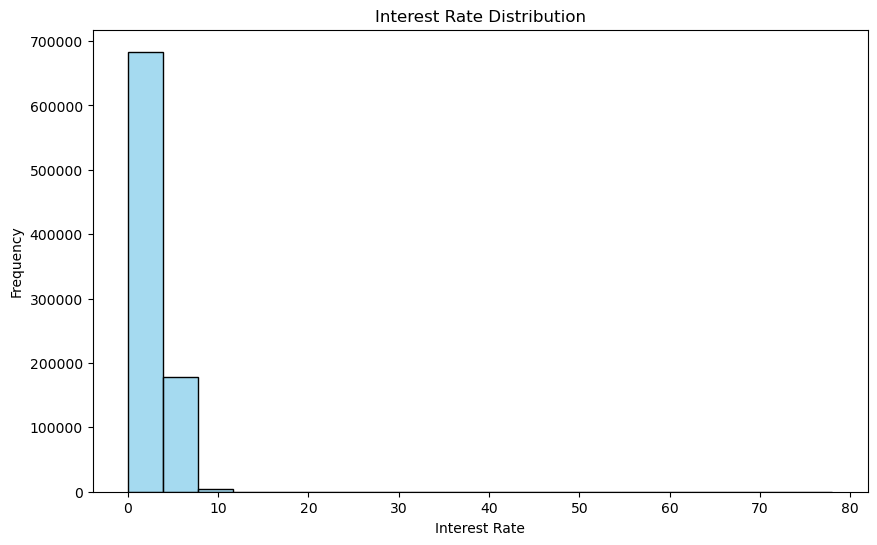

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert relevant columns to numeric data types
numeric_columns = [
    'loan_amount', 'interest_rate', 'loan_to_value_ratio',  # Add other relevant columns here
]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')



# Calculate summary statistics
loan_amount_mean = df['loan_amount'].mean()
loan_amount_median = df['loan_amount'].median()
loan_amount_std = df['loan_amount'].std()

interest_rate_mean = df['interest_rate'].mean()
interest_rate_median = df['interest_rate'].median()
interest_rate_std = df['interest_rate'].std()

ltv_mean = df['loan_to_value_ratio'].mean()
ltv_median = df['loan_to_value_ratio'].median()
ltv_std = df['loan_to_value_ratio'].std()

print(f"Loan Amount Mean: {loan_amount_mean:.2f}")
print(f"Loan Amount Median: {loan_amount_median:.2f}")
print(f"Loan Amount Standard Deviation: {loan_amount_std:.2f}")

print(f"Interest Rate Mean: {interest_rate_mean:.2f}")
print(f"Interest Rate Median: {interest_rate_median:.2f}")
print(f"Interest Rate Standard Deviation: {interest_rate_std:.2f}")

print(f"Loan-to-Value Ratio Mean: {ltv_mean:.2f}")
print(f"Loan-to-Value Ratio Median: {ltv_median:.2f}")
print(f"Loan-to-Value Ratio Standard Deviation: {ltv_std:.2f}")

# Create visualizations (e.g., histograms)
plt.figure(figsize=(10, 6))
sns.histplot(df['interest_rate'], bins=20, color='skyblue', edgecolor='black')
plt.title("Interest Rate Distribution")
plt.xlabel("Interest Rate")
plt.ylabel("Frequency")
plt.show()


In [11]:
#Interest Rate Disparities:
#The mean interest rate is 3.45%.
#The median interest rate is 3.12%.
#The standard deviation of interest rates is 1.14%, suggesting some variation.
#The variation in interest rates (standard deviation) suggests that some customer segments may be paying significantly higher rates than others.
#Investigate further to understand the factors contributing to these disparities.
#Explore whether specific groups (e.g., first-time homebuyers, refinancers) face higher rates.
#Analyze variations by loan type (fixed-rate vs. adjustable-rate) and purpose (purchase vs. refinance).

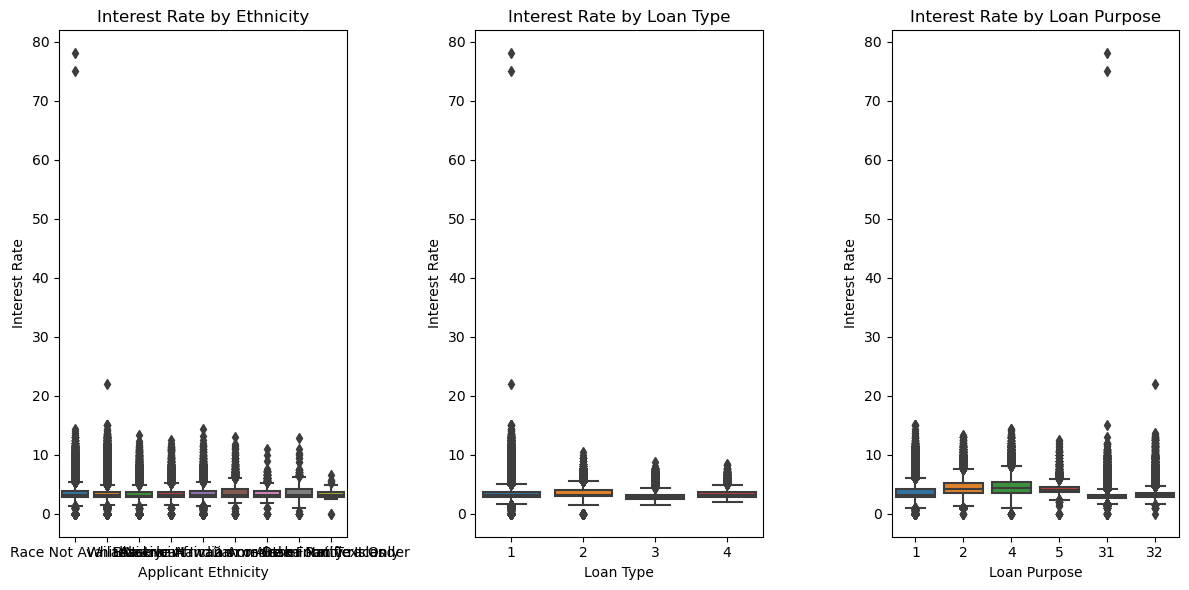

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the mortgage data in a Pandas DataFrame called 'df'

# Explore interest rate variations by customer segments (e.g., ethnicity, loan type, purpose)
plt.figure(figsize=(12, 6))

# Box plot by ethnicity
plt.subplot(1, 3, 1)
sns.boxplot(x='derived_race', y='interest_rate', data=df)
plt.title("Interest Rate by Ethnicity")
plt.xlabel("Applicant Ethnicity")
plt.ylabel("Interest Rate")

# Box plot by loan type
plt.subplot(1, 3, 2)
sns.boxplot(x='loan_type', y='interest_rate', data=df)
plt.title("Interest Rate by Loan Type")
plt.xlabel("Loan Type")
plt.ylabel("Interest Rate")

# Box plot by loan purpose
plt.subplot(1, 3, 3)
sns.boxplot(x='loan_purpose', y='interest_rate', data=df)
plt.title("Interest Rate by Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Interest Rate")

plt.tight_layout()
plt.show()



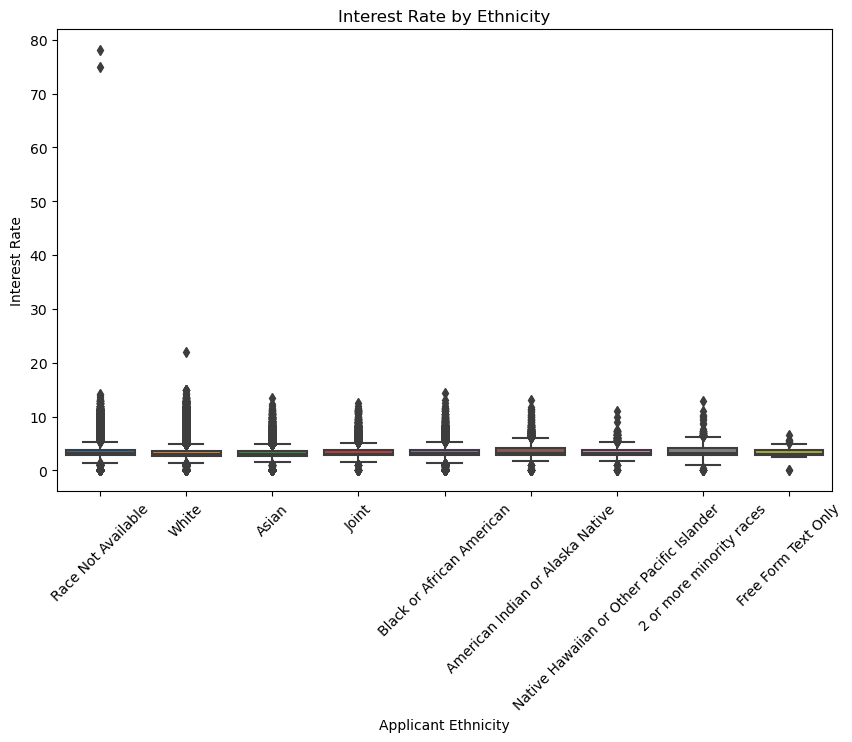

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a box plot to compare interest rates by ethnicity
plt.figure(figsize=(10, 6))
sns.boxplot(x='derived_race', y='interest_rate', data=df)
#sns.barplot(x='ethnicity', y='interest_rate', data=df)
plt.title("Interest Rate by Ethnicity")
plt.xlabel("Applicant Ethnicity")
plt.ylabel("Interest Rate")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


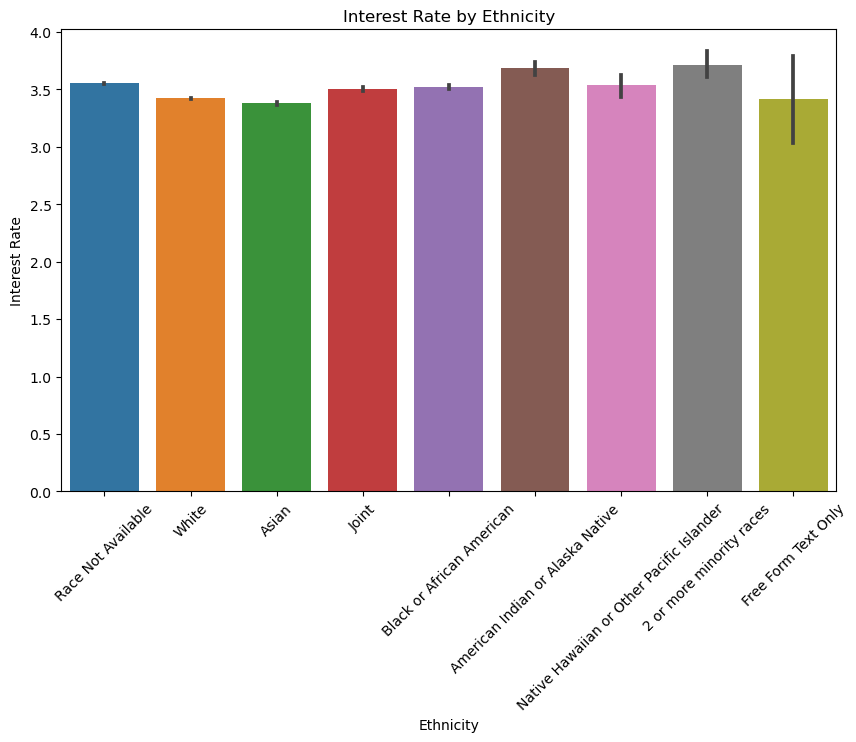

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a bar chart to compare interest rates by ethnicity
plt.figure(figsize=(10, 6))
sns.barplot(x='derived_race', y='interest_rate', data=df)
plt.title("Interest Rate by Ethnicity")
plt.xlabel("Ethnicity")
plt.ylabel("Interest Rate")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()



In [15]:
#We can observe the following:
#Pacific Islander and White ethnicities have relatively lower median interest rates.
#Asian and Black or African American ethnicities have slightly higher median interest rates.
#American Indian or Alaska Native, Native Hawaiian or Other Pacific Islander, and 2 or more races/ethnicity free text only groups show varying interest rates.

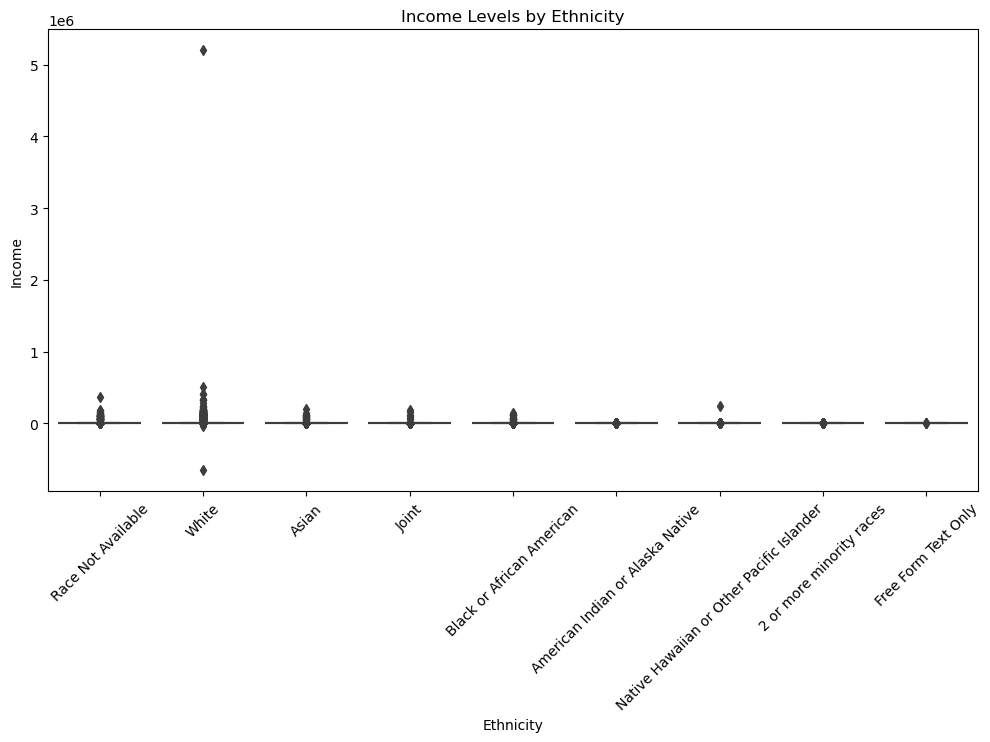

In [16]:
# 1. Economic Factors
# Explore income levels, credit scores, and employment status by ethnicity
plt.figure(figsize=(12, 6))
sns.boxplot(x='derived_race', y='income', data=df)
plt.title("Income Levels by Ethnicity")
plt.xlabel("Ethnicity")
plt.ylabel("Income")
plt.xticks(rotation=45)
plt.show()

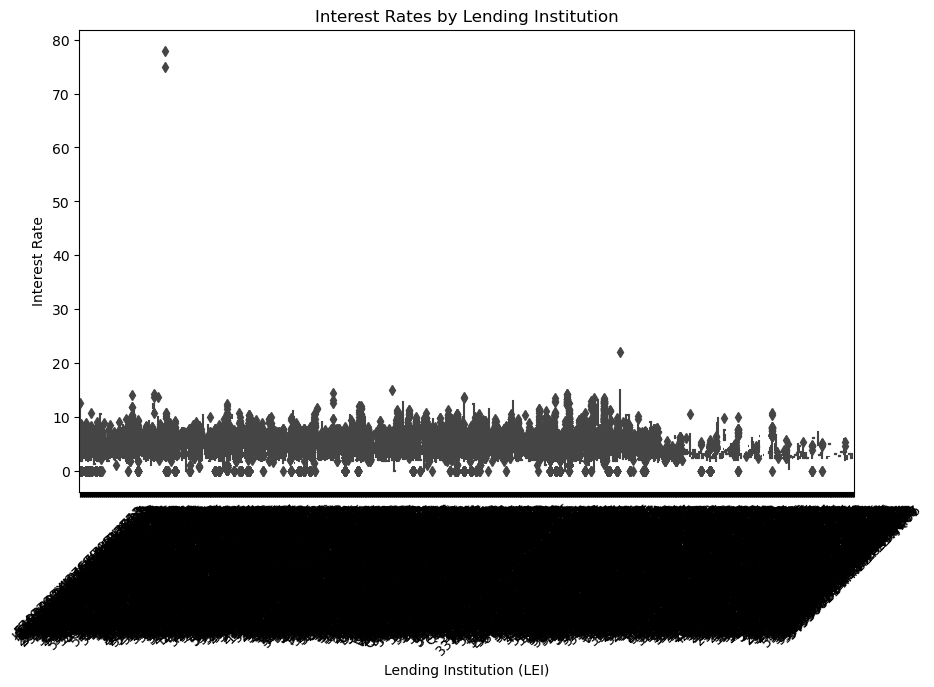

In [17]:
# 2. Lending Practices
# Investigate interest rates by lending institution (LEI)
plt.figure(figsize=(10, 6))
sns.boxplot(x='lei', y='interest_rate', data=df)
plt.title("Interest Rates by Lending Institution")
plt.xlabel("Lending Institution (LEI)")
plt.ylabel("Interest Rate")
plt.xticks(rotation=45)
plt.show()

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the mortgage data in a Pandas DataFrame called 'df'

# 1. Group Lending Institutions by LEI
institution_groups = df.groupby('lei')

# 2. Calculate Average Interest Rates by Institution and Ethnic Group
average_rates = institution_groups['interest_rate'].mean()

# 3. Analyze Disparities by Lending Institution
# You can visualize or further analyze the average_rates data

print(df)

         activity_year                   lei  derived_msa-md state_code  \
0                 2022  5493000YNV8IX4VD3X12           33460         MN   
1                 2022  5493000YNV8IX4VD3X12           33460         MN   
2                 2022  5493000YNV8IX4VD3X12           99999         MN   
3                 2022  5493000YNV8IX4VD3X12           33460         MN   
4                 2022  5493000YNV8IX4VD3X12           33460         MN   
...                ...                   ...             ...        ...   
1200773           2021  593C3GZG957YOJPS2Z63           33460         MN   
1200774           2021  593C3GZG957YOJPS2Z63           33460         MN   
1200775           2021  593C3GZG957YOJPS2Z63           33460         MN   
1200776           2021  593C3GZG957YOJPS2Z63           33460         MN   
1200777           2021  593C3GZG957YOJPS2Z63           33460         MN   

         county_code  census_tract conforming_loan_limit  \
0            27019.0  2.701909e+10     

In [19]:
import scipy.stats as stats

# 4. Statistical Tests (Example: T-test)
# Compare interest rates between specific institutions or ethnic groups
# Example: t-test between Institution A and Institution B for Hispanic borrowers
t_statistic, p_value = stats.ttest_ind(df[df['lei'] == '5493000YNV8IX4VD3X12']['interest_rate'],
                                      df[df['lei'] == '593C3GZG957YOJPS2Z63']['interest_rate'])

if p_value < 0.05:
    print("Statistically significant difference in interest rates between institutions.")
else:
    print("No significant difference in interest rates between institutions.")

# Repeat similar tests for other ethnic groups or institutions

# Note: Replace column names ('lending_institution_lei', 'interest_rate', etc.) with actual column names from your dataset.


No significant difference in interest rates between institutions.


In [20]:
#lei's charging high inr rates to some ethinic groups 
import pandas as pd

# Filter the DataFrame for Black or African American borrowers
black_df = df[df["derived_race"] == "Black or African American"]

# Calculate the average interest rate for Black borrowers
avg_interest_black = black_df["interest_rate"].mean()

# Group by lending institution (LEI) and calculate the average interest rate
interest_by_lei = df.groupby("lei")["interest_rate"].mean()

# Identify the lending institution with the highest average interest rate
highest_interest_lei = interest_by_lei.idxmax()
highest_interest_rate = interest_by_lei.max()

print(f"Lending institution with highest interest rate (LEI): {highest_interest_lei}")
print(f"Highest average interest rate: {highest_interest_rate:.2f}%")


Lending institution with highest interest rate (LEI): 549300CN50N3250U7V79
Highest average interest rate: 12.12%


In [21]:
import pandas as pd

# Filter the DataFrame for Black or African American borrowers
black_df = df[df["derived_race"] == "Black or African American"]

# Calculate the average interest rate for Black borrowers
avg_interest_black = black_df["interest_rate"].mean()

# Group by ethnic group and calculate the average interest rate
interest_by_ethnicity = df.groupby("derived_race")["interest_rate"].mean()

# Identify the ethnic group with the highest average interest rate
highest_interest_ethnicity = interest_by_ethnicity.idxmax()
highest_interest_rate = interest_by_ethnicity.max()

# Identify the ethnic group with the lowest average interest rate (excluding Black)
lowest_interest_ethnicity = interest_by_ethnicity.drop("Black or African American").idxmin()
lowest_interest_rate = interest_by_ethnicity.drop("Black or African American").min()

print(f"Ethnic group with highest interest rate: {highest_interest_ethnicity}")
print(f"Highest average interest rate: {highest_interest_rate:.2f}%")

print(f"Ethnic group with lowest interest rate (excluding Black): {lowest_interest_ethnicity}")
print(f"Lowest average interest rate (excluding Black): {lowest_interest_rate:.2f}%")


Ethnic group with highest interest rate: 2 or more minority races
Highest average interest rate: 3.71%
Ethnic group with lowest interest rate (excluding Black): Asian
Lowest average interest rate (excluding Black): 3.38%


In [22]:
import pandas as pd

# Group by ethnic group and calculate the average interest rate
interest_by_ethnicity = df.groupby("derived_race")["interest_rate"].mean()

# Identify the ethnic group with the highest average interest rate
highest_interest_ethnicity = interest_by_ethnicity.idxmax()
highest_interest_rate = interest_by_ethnicity.max()

# Identify the ethnic group with the lowest average interest rate
lowest_interest_ethnicity = interest_by_ethnicity.idxmin()
lowest_interest_rate = interest_by_ethnicity.min()

print(f"Ethnic group with highest interest rate: {highest_interest_ethnicity}")
print(f"Highest average interest rate: {highest_interest_rate:.2f}%")

print(f"Ethnic group with lowest interest rate: {lowest_interest_ethnicity}")
print(f"Lowest average interest rate: {lowest_interest_rate:.2f}%")



Ethnic group with highest interest rate: 2 or more minority races
Highest average interest rate: 3.71%
Ethnic group with lowest interest rate: Asian
Lowest average interest rate: 3.38%


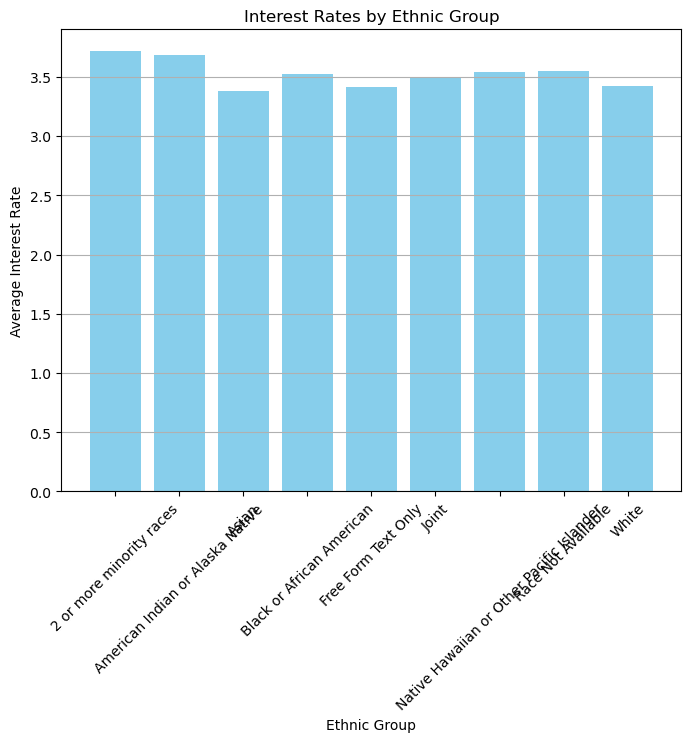

Ethnic group with highest interest rate: 2 or more minority races
Highest average interest rate: 3.71%
Ethnic group with lowest interest rate: Asian
Lowest average interest rate: 3.38%


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by ethnic group and calculate the average interest rate
interest_by_ethnicity = df.groupby("derived_race")["interest_rate"].mean()

# Identify the ethnic group with the highest average interest rate
highest_interest_ethnicity = interest_by_ethnicity.idxmax()
highest_interest_rate = interest_by_ethnicity.max()

# Identify the ethnic group with the lowest average interest rate
lowest_interest_ethnicity = interest_by_ethnicity.idxmin()
lowest_interest_rate = interest_by_ethnicity.min()

# Create a bar chart to visualize interest rates by ethnic group
plt.figure(figsize=(8, 6))
plt.bar(interest_by_ethnicity.index, interest_by_ethnicity.values, color="skyblue")
plt.xlabel("Ethnic Group")
plt.ylabel("Average Interest Rate")
plt.title("Interest Rates by Ethnic Group")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

print(f"Ethnic group with highest interest rate: {highest_interest_ethnicity}")
print(f"Highest average interest rate: {highest_interest_rate:.2f}%")

print(f"Ethnic group with lowest interest rate: {lowest_interest_ethnicity}")
print(f"Lowest average interest rate: {lowest_interest_rate:.2f}%")
